# Bài tập lớn Học máy

Mỗi nhóm sinh viên được phân một tập tin chưa dữ liệu bất động sản (bđs) được thu thập từ website gồm 4 thuộc tính 
1. Mã bất động sản (Id) mang định danh cho tin đăng. Mã bất động sản mang kiểu số 
2. Loại nhà (HouseTypeCssClass) nhận một trong các giá trị: 

<ul>
    <li>tp-none: nếu tin rao bất động sản là tin bán hoặc cho thuê đất</li>
    <li>tp-house: chỉ các loại nhà</li>
    <li>tp-villa: biệt thự</li>
    <li>tp-hotel: khách sạn</li>
    <li>tp-warehouse: nhà kho</li>
    <li>tp-building: cao ốc, văn phòng </li>
    <li>tp-apartment: căn hộ, chung cư</li>
</ul>

Sinh viên sử dụng gói Pandas để đọc dữ liệu từ tập tin .csv

In [1]:
import pandas

In [2]:
data = pandas.read_csv(filepath_or_buffer='bds.csv', 
                       usecols=['Id', 'HouseTypeCssClass', 'Title', 'Content'])

Hàm read_csv có tham số đầu tiên (filepath_or_buffer) là đường dẫn của tập tin. usecols nhận vào một danh sách các cột cần đọc vào. 

Tiếp theo là kiểm tra kích thước của tập dữ liệu

In [3]:
data.shape

(5000, 4)

Dữ liệu gồm 5000 dòng và 4 cột, tương ứng với một bộ (5000, 4) 

Thử hiển thị một số dòng để xem đã đọc đúng hay chưa 

In [4]:
data.head(5)

,Id,HouseTypeCssClass,Title,Content
0,1183515,tp-villa,��Vinpearl Phú Quốc triển khai gói vay không l...,1. Thông tin chung. \n- Tổng diện tích đất: 39...
1,2657646,tp-none,Bán 2 lô đất hẻm rộng Hoàng Văn Thụ - tp Quy Nhơn,"Cần bán 2 lô đất hẻm rộng Hoàng Văn Thụ , tp ..."
2,789512,tp-apartment,"hottt,chung cư greenstar,chủ đầu tư bung hàng ...",Để chuẩn bj hàng cho buổi mở bán trưa thứ 7(11...
3,2226803,tp-villa,Bán đất diện tích 300 vị trí tuyệt đẹp thuận t...,Bán đất diện tích 300 vị trí tuyệt đẹp thuận t...
4,1541985,tp-house,Hẻm 86 Trường Chinh-Q.TB 5.6x12m NH 6.1m 1 lầu...,"""Cần bán gấp nhà hẻm 86 Trường Chinh, Tân Bình..."


Đếm số lượng các nhãn (HouseTypeCssClass)

In [5]:
data['HouseTypeCssClass'].value_counts()

tp-house        1985
tp-apartment    1640
tp-none         1158
tp-villa         131
tp-building       35
tp-warehouse      31
tp-hotel          20
Name: HouseTypeCssClass, dtype: int64

Vẽ biểu đồ 

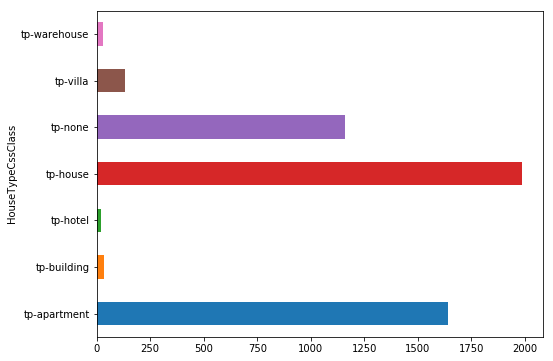

In [6]:
# Lưu ý dòng này nếu sử dụng notebook
% matplotlib inline
import matplotlib.pyplot as plt

# chỉnh kích thước ảnh 
fig = plt.figure(figsize=(8,6))
data.groupby('HouseTypeCssClass').HouseTypeCssClass.count().plot.barh()
plt.show()

Lưu ý: sinh viên phải tự tay gán lại nhãn với những dữ liệu bị sai. 

Ngoài ra sinh viên cũng cần loại bỏ những từ không có ý nghĩa cho việc phân loại hoặc những ký tự lạ,... Dưới đây là một ví dụ loại bỏ các ký tự không phải ASCII bằng biểu thức chính quy. 

In [7]:
import regex

text = '� • ►► ✿ Khu đô thị Nha Trang Pearl ven sông Cái � ☎ ' 

In [8]:
text

'� • ►► ✿ Khu đô thị Nha Trang Pearl ven sông Cái � ☎ '

In [9]:
regex.sub('[^\p{Latin}\n\t\s]', '', text).strip()

'Khu đô thị Nha Trang Pearl ven sông Cái'

Sinh viên viết hàm chuẩn hóa và lọc những từ không liên quan đến phân loại theo mẫu sau: 

In [10]:
def replace_words(text):
    return regex.sub('[^\p{Latin}\n\t\s]', '', text).strip()

Áp dụng vào cột tiêu đề (Title) của toàn bộ dataframe

In [11]:
data['Title'] = data['Title'].apply(replace_words)

In [12]:
data.head(5)

,Id,HouseTypeCssClass,Title,Content
0,1183515,tp-villa,Vinpearl Phú Quốc triển khai gói vay không lãi...,1. Thông tin chung. \n- Tổng diện tích đất: 39...
1,2657646,tp-none,Bán lô đất hẻm rộng Hoàng Văn Thụ tp Quy Nhơn,"Cần bán 2 lô đất hẻm rộng Hoàng Văn Thụ , tp ..."
2,789512,tp-apartment,hotttchung cư greenstarchủ đầu tư bung hàng tr...,Để chuẩn bj hàng cho buổi mở bán trưa thứ 7(11...
3,2226803,tp-villa,Bán đất diện tích vị trí tuyệt đẹp thuận tiện...,Bán đất diện tích 300 vị trí tuyệt đẹp thuận t...
4,1541985,tp-house,Hẻm Trường ChinhQTB xm NH m lầu mới Giá tỷ,"""Cần bán gấp nhà hẻm 86 Trường Chinh, Tân Bình..."


Lưu ý: Sinh viên nghiên cứu thêm về những từ không có ý nghĩa hay các ký tự lạ để viết vào báo cáo. 

Tiếp theo là chia tập dữ liệu thành phần huấn luyện và phần kiểm tra. Ở ví dụ này chỉ thực hiện phân loại tiêu đề. 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data['Title'], 
                                                    data['HouseTypeCssClass'], 
                                                    train_size = 0.9)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Kiểm tra kích thước của tập huấn luyện và tập kiểm tra

In [15]:
print("X train", len(X_train))
print("X test", len(X_test))

X train 4500
X test 500


Ví dụ phân loại đơn giản bằng IF-IDF

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Thực hiện đếm từ ở tập huấn luyện. Kết quả trả về là ma trận các mẫu từ và số lần xuất hiện. 

In [17]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [18]:
X_train_counts.shape

(4500, 3108)

Chuyển sang TF-IDF

In [19]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [20]:
X_train_tfidf.shape

(4500, 3108)

X_train_tfidf là ma trận kiểu numpy. 

In [21]:
type(X_train_tfidf)

scipy.sparse.csr.csr_matrix

Ví dụ phân loại đơn giản bằng SVM 

In [22]:
from sklearn.svm import LinearSVC

Thực hiện huấn luyện mô hình

In [24]:
model = LinearSVC().fit(X_train_tfidf, y_train)

Thử dự báo

In [25]:
test_case_1 = "Cần bán gấp nhà ở Bạch Mai- Giá siêu rẻ 1,95 tỷ- SĐCC – nhà hiếm"

In [26]:
vec_test_case_1 = count_vect.transform([test_case_1])

In [27]:
vec_test_case_1.shape

(1, 3108)

In [28]:
model.predict(vec_test_case_1)

array(['tp-house'], dtype=object)

Đánh gía mô hình bằng độ chính xác (accuracy)

In [29]:
from sklearn.metrics import accuracy_score

Chuyển tập 

In [30]:
vec_tests = count_vect.transform(X_test)

In [31]:
y_pred = model.predict(vec_tests)

In [32]:
accuracy_score(y_test, y_pred)

0.88